# Plan for report

How well can we predict life expectancy based on these factors.

### Have to include:
• A description of the dataset 
• Our question
• Which kind of analysis where implementing
• And obviously the results

What analysis do WE think is important, 

What is the question and what is the model we want to analyse e.g linear regression log regression decision tree  etc, more about showing that you know how to face,

## Plan going forward.

1. Introduction into the question and the search area.
2. Explanatory Analysis followed by Hypothesis, Variables of interest for our hypothesis, and then analysis of any results gathered, Section conclusion
3. Predictive analysise, Introduce sections, Explain undertaking, Model Hypothesis, initial model result analysis combined with quality analysis and then conclusion with the test analysis
4. Conclusion

Linear and Log Regressions (fine)
Confusion matrix on a basic level (fine)
Optimised Confusion matrix (on the way)
Decision tress (who the fuck knows)

##### we need to establish an understanding of the data and the trends present, so that we can then make some quality arguments, this should (hopefully) come as we do the initial coding and analysis :)

In [18]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score

ds = pd.read_csv("Chosen Life Exp dataset.csv")

ds.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV_AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

ds.isnull().sum()*100/ds.isnull().count()
country_list = ds.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

for country in country_list:
    ds.loc[ds['Country'] == country,fill_list] = ds.loc[ds['Country'] == country,fill_list].interpolate()

ds.dropna(inplace=True)
# ds['Life_Expectancy'].astype(int)
print(ds['Life_Expectancy'])
ds.info(verbose=True)

# print(ds['Life_Expectancy'])

life_expec = ds['Life_Expectancy']

# for i in life_expec:
#     if life_expec.value(i) <= 40:
#         life_expec.value(i) = 0
#     else:
#         life_expec.values(i) = "hahaha"
    
#     elif i <= 50:
#         return i = 1
#     elif i <=60:
#         return i = 2
#     elif i <= 70:
#         return i = 3
#     elif i <= 80:
#         return i = 4
#     else:
#         return i = 5
        


# print(ds['Life_Expectancy'])
        
        

0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: Life_Expectancy, Length: 1987, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   1987 non-null   object 
 1   Year                      1987 non-null   int64  
 2   Status                    1987 non-null   object 
 3   Life_Expectancy           1987 non-null   int64  
 4   Adult_Mortality           1987 non-null   float64
 5   Infant_Deaths             1987 non-null   int64  
 6   Alcohol                   1987 non-null   float64
 7   Percentage_Exp            1987 non-null   float64
 8   HepatitisB                1987 non-null   float64
 9   Measles                   1987 non-null   int64  
 10  BMI                       1987 non-null   float64
 11  Under_Five_De

In [19]:
print('Hello, is it me you')

Hello, is it me you


In [20]:
from sklearn.model_selection import train_test_split #Splitting the dataset into the train, validation and test variables

train, other = train_test_split(ds, test_size=0.4, random_state=0)

validation, test = train_test_split(other, test_size=0.5, random_state=0)

In [21]:
#     life_expec_train = train["Life_Expectancy"]
#     life_expec_train[0] = 0
#     life_expec_train.to_frame()
#     life_expec_train = int(life_expec_train)
#     print(life_expec_train)



X_train = train.drop(columns=['Life_Expectancy','Country','Status'])
y_train = train['Life_Expectancy']

# life_expec_val = train["Life_Expectancy"]
# life_expec_val[0] = 0
# life_expec_val = pd.to_numeric(life_expec_val)


X_val = validation.drop(columns=['Life_Expectancy','Country','Status'])
y_val = validation['Life_Expectancy']

# life_expec_test = train["Life_Expectancy"]
# life_expec_test[0] = 0
# life_expec_test = pd.to_numeric(life_expec_test)

X_test = test.drop(columns=['Life_Expectancy','Country','Status'])
y_test = test['Life_Expectancy']



In [22]:

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')



In [23]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

def my_fwd_selector(X_train, y_train, X_val, y_val):
    print('=============== Begining forward selection =================')
    cols = list(X_train.columns)
    best_val_acc = 0
    selected_vars = []
    while len(cols) > 0:
        print('Trying {} var models'.format(len(selected_vars) + 1))
        candidate = None
        for i in range(len(cols)):
            current_vars = selected_vars.copy()
            current_vars.append(cols[i])
            if len(current_vars) == 1:
                new_X_train = X_train[current_vars].values.reshape(-1, 1)
                new_X_val = X_val[current_vars].values.reshape(-1, 1)
            else:
                new_X_train = X_train[current_vars]                
                new_X_val = X_val[current_vars]
            
            mod = LogisticRegression(C=1e9).fit(new_X_train, y_train)
            val_acc = accuracy_score(y_val, mod.predict(new_X_val))
            if val_acc - best_val_acc > 0.005:
                candidate = cols[i]
                best_val_acc = val_acc
        if candidate is not None:
            selected_vars.append(candidate)
            cols.remove(candidate)
            print('------- Adding {} to the model ---------'.format(candidate))
        else:
            break
        print('Columns in current model: {}'.format(', '.join(selected_vars)))
        print('Best validation accuracy is {}'.format(np.round(best_val_acc, 3)))
    return selected_vars


In [24]:
from sklearn.metrics import confusion_matrix
selected_columns = my_fwd_selector(X_train, y_train, X_val, y_val)

model = LogisticRegression(C=1e9).fit(X_train[selected_columns], y_train)

y_train_predicted = model.predict(X_train[selected_columns])
y_val_predicted = model.predict(X_val[selected_columns])
y_test_predicted = model.predict(X_test[selected_columns])

print('======= Accuracy  table =======')
print('Training accuracy is:    {}'.format(accuracy_score(y_train, y_train_predicted)))
print('Validation accuracy is:  {}'.format(accuracy_score(y_val, y_val_predicted)))
print('Test accuracy is:  {}'.format(accuracy_score(y_test, y_test_predicted)))
cm1=confusion_matrix(y_train,y_train_predicted, labels=[1,0])

print("=========== Training confusion matrix and precision/recall ===========")
print(cm1)

TP = 729
FN = 80
FP = 131
TN = 649

print('Recall is:     {}'.format(TP / (TP + FN)))
print('Precision is:  {}'.format(TP / (TP + FP)))

cm = confusion_matrix(y_test, y_test_predicted, labels=[1, 0])

print("========= Test Confusion Matrix and accuracy ===========")

print(cm)

TP = 97
FN = 10
FP = 10
TN = 82

print('Recall is:     {}'.format(TP / (TP + FN)))
print('Precision is:  {}'.format(TP / (TP + FP)))
# selected_columns = my_fwd_selector(X_train, y_train, X_val, y_val)
# # model = LogisticRegression(C=1e9).fit(X_train[selected_columns], y_train)
# mod = LogisticRegression(C=1e9).fit(X_train, y_train)

# y_train_predicted = model.predict(X_train[selected_columns])
# y_val_predicted = model.predict(X_val[selected_columns])
# y_test_predicted = model.predict(X_test[selected_columns])

# print('======= Accuracy  table =======')
# print('Training accuracy is:    {}'.format(accuracy_score(y_train, y_train_predicted)))
# print('Validation accuracy is:  {}'.format(accuracy_score(y_val, y_val_predicted)))

# from sklearn.metrics import confusion_matrix

# # Your code here

# y_test_predicted = mod.predict(X_test[columns])

# cm = confusion_matrix(y_test, y_test_predicted, labels=[1, 0])
# print(cm)

# from sklearn.metrics import precision_score, recall_score


=============== Begining forward selection =================
Trying 1 var models
------- Adding Income_Comp_Of_Resources to the model ---------
Columns in current model: Income_Comp_Of_Resources
Best validation accuracy is 0.864
Trying 2 var models
------- Adding Adult_Mortality to the model ---------
Columns in current model: Income_Comp_Of_Resources, Adult_Mortality
Best validation accuracy is 0.884
Trying 3 var models
------- Adding Schooling to the model ---------
Columns in current model: Income_Comp_Of_Resources, Adult_Mortality, Schooling
Best validation accuracy is 0.904
Trying 4 var models
======= Accuracy  table =======
Training accuracy is:    0.8758389261744967
Validation accuracy is:  0.9042821158690176
Test accuracy is:  0.8768844221105527
=========== Training confusion matrix and precision/recall ===========
[[534  65]
 [ 83 510]]
Recall is:     0.9011124845488258
Precision is:  0.8476744186046512
========= Test Confusion Matrix and accuracy ===========
[[201  22]
 [ 27 

In [25]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score

ds = pd.read_csv("Chosen Life Exp dataset 2.csv")

ds.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV_AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

ds.isnull().sum()*100/ds.isnull().count()
country_list = ds.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

for country in country_list:
    ds.loc[ds['Country'] == country,fill_list] = ds.loc[ds['Country'] == country,fill_list].interpolate()

ds.dropna(inplace=True)
# ds['Life_Expectancy'].astype(int)
print(ds['Life_Expectancy'])
ds.info(verbose=True)

# print(ds['Life_Expectancy'])

life_expec = ds['Life_Expectancy']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 1987, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   1987 non-null   object 
 1   Year                      1987 non-null   int64  
 2   Status                    1987 non-null   object 
 3   Life_Expectancy           1987 non-null   float64
 4   Adult_Mortality           1987 non-null   float64
 5   Infant_Deaths             1987 non-null   int64  
 6   Alcohol                   1987 non-null   float64
 7   Percentage_Exp            1987 non-null   float64
 8   HepatitisB                1987 non-null   float64
 9   Measles                   1987 non-null   int64  
 10  BMI                       1987 no

In [26]:
ds = pd.read_csv("Chosen Life Exp dataset 2.csv")

In [27]:
import matplotlib.pyplot as plt

def tss(y):
    ymean = np.mean(y)
    return sum(pow((y - ymean), 2))

In [28]:
def rsquare(rss,tss):
    frac = rss/tss
    output = 1 - frac
    return output

In [29]:
import numpy as np

def rss(x, y, a, b):
    '''
    This function calculates the RSS for the model y = a*x + b value given:
    - x: a list
    - y: a list
    - a: a float
    - b: a float
    '''
    x = np.asarray(x) #Cast to numpy array so that we can do arithmatic with arrays
    y = np.asarray(y)
    
    y_predicted = a*x+b # This is an array. Uncomment next line to see
    residuals = y - y_predicted
    
    return sum(pow(residuals, 2))

fit coefficient a = [[-0.04871225]]
fot coefficient b = [76.51554424]
105473.94732369727
0.4362981591327556


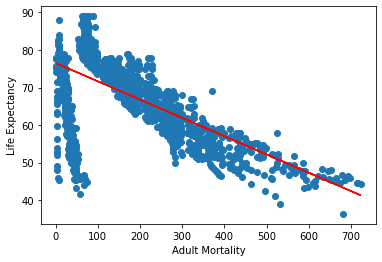

In [17]:
Life_expec= ds['Life_Expectancy']
testset = ds['Adult_Mortality']

Life_expc_arr = np.asarray(Life_expec)
TestArr = np.asarray(testset)

xfit = TestArr
yfit= Life_expc_arr

plt.scatter(TestArr,Life_expc_arr)
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")

import sklearn.linear_model
Y = yfit.reshape(-1,1)
X = xfit.reshape(-1,1)
linearModel = sklearn.linear_model.LinearRegression()
linearModel.fit(X,Y)

print("fit coefficient a = {}".format(linearModel.coef_))
print("fot coefficient b = {}".format(linearModel.intercept_))

RSS = rss(xfit,yfit,linearModel.coef_[0],linearModel.intercept_[0])
print(RSS)
lineOfit= linearModel.coef_*xfit + linearModel.intercept_

plt.plot(xfit,lineOfit[0],'r')

TSS = tss(yfit)
rSquare = rsquare(RSS,TSS)
print(rSquare)